데이터 : https://www.kaggle.com/datasets/aungpyaeap/fish-market


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/Chanmi-K/Python/raw/main/DataZip/FishMarket.zip

--2022-07-02 01:30:09--  https://github.com/Chanmi-K/Python/raw/main/DataZip/FishMarket.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Chanmi-K/Python/main/DataZip/FishMarket.zip [following]
--2022-07-02 01:30:09--  https://raw.githubusercontent.com/Chanmi-K/Python/main/DataZip/FishMarket.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2444 (2.4K) [application/zip]
Saving to: ‘FishMarket.zip’

FishMarket.zip      100%[===================>]   2.39K  --.-KB/s    in 0s      

2022-07-02 01:30:09 (47.8 MB/s) - ‘FishMarket.zip’ saved [2444/2444]



In [ ]:
!unzip FishMarket.zip

Archive:  FishMarket.zip
  inflating: Fish.csv                


# CodeBook

In [ ]:
fish_df = pd.read_csv('Fish.csv')
fish_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


* Species	: species name of fish 종 : 어류의 종명
* Weight	: weight of fish in Gram g 무게 : 어류 무게(그램)
* Length1	: vertical length in cm 길이1 : 세로길이(cm)
* Length2	: diagonal length in cm 길이2 : cm 단위의 대각선 길이
* Length3	: cross length in cm 길이3 : cm 단위의 가로길이
* Height	: height in cm 높이 : cm 단위 높이
* Width	: diagonal width in cm 너비 : cm 단위의 대각선 너비

-Species	: {'Smelt', 'Roach', 'Perch', 'Bream', 'Whitefish', 'Parkki', 'Pike'}
> 1) Bream	: 도미
2) Smelt	: 빙어
3) Perch	: 농어
4) Pike	: 강꼬치고기(민물 바라쿠다)

> 5) Roach	: 잉어
6) Whitefish : 흰살생선, 송어
7) Parkki	: 청돔 [곤들매기]

# 데이터 준비하기

In [ ]:
class FishDataSet:
  def __init__(self, file='Fish.csv'):
    self.fishFile = pd.read_csv(file)

  def getFeatureData(self, *selFeature):
    self.selFeature = list(selFeature)
    fishdata = self.fishFile
    selList = ['Species'] + self.selFeature
    selData = fishdata[selList]
    return selData

  def getSpeciesData(self, argSpecies, argFishList):
    argSpeciesData = argFishList[argFishList['Species'] == argSpecies]
    return argSpeciesData.iloc[:,1:].values

In [ ]:
fishObj = FishDataSet()

# 이진 분류

도미 빙어 구분하기

## 데이터 가져오기

In [ ]:
#대각선 길이와 무게 특성만 가져오기
featureData = fishObj.getFeatureData('Length2','Weight')

#도미 bream 데이터 가져오기
bream_data = fishObj.getSpeciesData('Bream', featureData)
bream_length = bream_data[:,0]
bream_weight = bream_data[:,1]

#빙어 smelt 데이터 가져오기
smelt_data = fishObj.getSpeciesData('Smelt', featureData)
smelt_length = smelt_data[:,0]
smelt_weight = smelt_data[:,1]

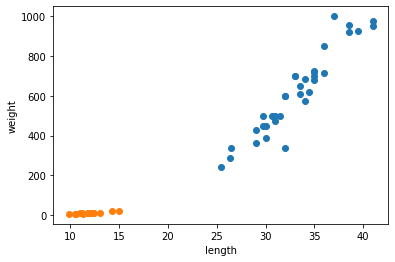

In [ ]:
#도미 빙어 데이터 산점도 그리기
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 데이터 준비하기

In [ ]:
#도미와 빙어 데이터를 하나의 데이터로 합치기
length = bream_length.tolist() + smelt_length.tolist()
weight = bream_weight.tolist() + smelt_weight.tolist()
print(length)
print(weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [ ]:
bs_data = np.column_stack((length, weight))
print(bs_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
#정답 데이터 만들기 1:도미, 0:빙어
bs_target = np.concatenate((np.ones(len(bream_length)), np.zeros(len(smelt_length))))
print(bs_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 훈련 세트와 테스트 세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    bs_data, bs_target, stratify=bs_target, random_state = 42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 전처리

In [ ]:
#표준점수를 활용한 전처리
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std

In [ ]:
#테스트 세트의 스케일도 변환
test_scaled = (test_input - mean) / std

## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
#새로운 데이터 예측
new = ([25, 150] - mean) / std
kn.predict([new])

array([1.])

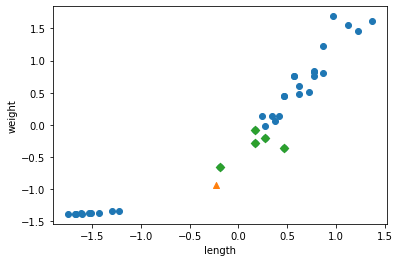

In [ ]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#저 이웃들이 정말 도미가 맞는지 확인
print(train_target[indexes])

[[1. 1. 1. 1. 1.]]


# 회귀

농어의 길이만으로 무게 예측
* 특성 : 농어 길이
* 타깃 : 농어 무게

## 데이터 가져오기

In [ ]:
#대각선 길이와 무게 특성만 가져오기
featureData = fishObj.getFeatureData('Length2','Weight')

#농어 Perch 데이터 가져오기
perch_data = fishObj.getSpeciesData('Perch', featureData)
perch_length = perch_data[:,0]
perch_weight = perch_data[:,1]

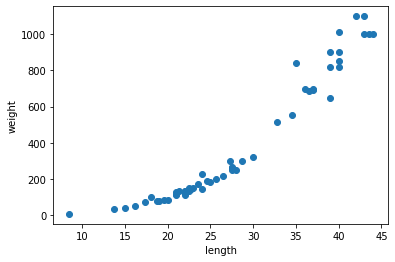

In [ ]:
#산점도 그리기
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 훈련 세트와 테스트 세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [ ]:
#2차원 배열 만들어주기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 선형 회귀

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


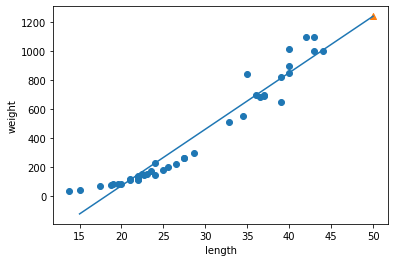

In [ ]:
#훈련 세트 산점도
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


산점도를 자세히 보면 일직선이라기 보다는 왼쪽으로 살짝 구부러진 곡선에 가깝다.

그렇다면 최적의 직선이 아니라 최적의 곡선을 찾아보자

## 다항 회귀

In [ ]:
#2차 방정식 그래프 그리기
#길이 제곱한 열 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [ ]:
print(train_poly[:3])

[[384.16  19.6 ]
 [484.    22.  ]
 [349.69  18.7 ]]


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


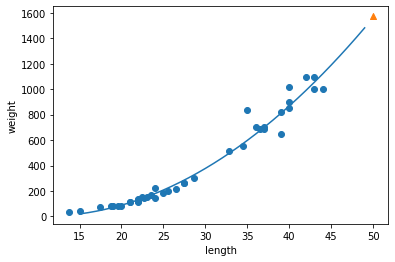

In [ ]:
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다
point = np.arange(15, 50)

#훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그린다
plt.plot(point, 1.01*point**2 -21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter(50, 1574, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


아직 테스트 세트 점수가 조금 더 높다 과소적합이 있는 듯 하다

# 특성 공학

기존 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성 공학**이라고 한다

이번엔 길이 뿐 아니라 높이와 두께도 함께 사용해보자

농어 무게 예측

* 특성 : 농어 길이, 높이, 두께
* 타깃 : 농어 무게

## 데이터 준비

In [ ]:
#대각선 길이와 높이, 두께, 무게 특성 가져오기
featureData = fishObj.getFeatureData('Length2', 'Height',	'Width','Weight')

#농어 Perch 데이터 가져오기
perch_data = fishObj.getSpeciesData('Perch', featureData)
perch_full = perch_data[:,:3]
perch_weight = perch_data[:,3]

In [ ]:
#훈련 세트와 테스트 세트로 나누자
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## PolynomialFeatures

입력 데이터를 변환

각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
#9개 특성이 어떤 입력의 조합으로 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
#테스트 세트도 변환
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.99035576703127


In [ ]:
#테스트 세트에 대한 점수 확인
print(lr.score(test_poly, test_target))

0.9712376207461858


## 규제

특성을 더 많이 추가하고 과대적합을 막기위해 규제를 시행

In [ ]:
#정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀

선형 회귀 모델에 규제를 추가한 모델

계수를 제곱한 값을 기준으로 규제를 적용

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9858005138215177


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9834233825354812


적절한 alpha 값을 찾아 다시 훈련 해보자

적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 R²값의 그래프를 그려보는 것이다.

훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha 값

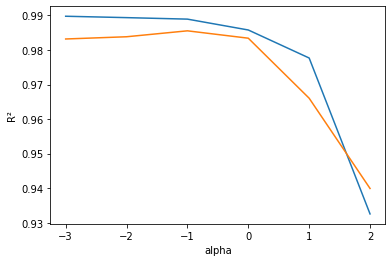

In [ ]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha_list = [0.001,0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #릿지 모델 만들기
  ridge = Ridge(alpha=alpha)
  #릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')   #0.001 => -3, 0.01 => -2, 100 => 2
plt.ylabel('R²')
plt.show()

적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트 점수가 가장 높은 -1, 즉 0.1이다.

alpha값을 0.1로 하여 최종 모델을 훈련해보자

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled, test_target))

0.9889439337370077
0.9855560623266433


### 라쏘 회귀

선형 회귀 모델에 규제를 추가한 모델

계수의 절댓값을 기준으로 규제를 적용

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9866087194385585


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9845141400519405


릿지 회귀 처럼 alpha 값을 바꾸어 가며 최적의 alpha 값을 찾아보자

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.465e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.931e+03, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


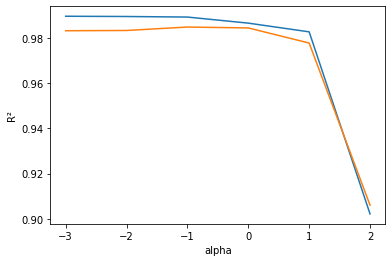

In [ ]:
train_score=[]
test_score=[]

alpha_list = [0.001,0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #라쏘 모델 만들기
  lasso = Lasso(alpha=alpha, max_iter=10000)    #반복횟수가 부족하면 에러 뜸 max_iter=10000으로 반복횟수 충분히 늘려줌
  #라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')   #0.001 => -3, 0.01 => -2, 100 => 2
plt.ylabel('R²')
plt.show()

라쏘 모델의 최적의 alpha 값은 1, 즉 10이다.

이 값으로 다시 모델을 훈련해보자

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled, test_target))

0.9827448294674559
0.9777227557806883


# 로지스틱 회귀

## 데이터 준비하기

무작위 7개 생선의 특성이 주어졌을 때 각 생선의 확률을 출력

* 입력 : Weight, Length2, Length3, Height, Width
* 타깃 : Species

In [ ]:
fish_df = pd.read_csv('Fish.csv')
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
fish_df = fish_df.drop(columns='Length1')

In [ ]:
#생선 종류 출력
print(pd.unique(fish_df['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
#입력 데이터 만들기
fish_input = fish_df[['Weight','Length2','Length3','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
#타깃 데이터 만들기
fish_target = fish_df['Species'].to_numpy()

In [ ]:
#훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
#표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 이진 분류

도미와 빙어를 사용해 이진 분류를 수행

In [ ]:
#도미와 빙어 데이터만 가져오기
bream_smelt_indexes = (train_target=='Bream')|(train_target=='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
#처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
#예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


## 다중 분류

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=25, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9495798319327731
0.925


In [ ]:
#테스트 세트의 처음 5개 샘플 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
#예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.011 0.864 0.    0.118 0.005 0.002]
 [0.    0.002 0.037 0.    0.006 0.955 0.   ]
 [0.    0.    0.028 0.937 0.011 0.025 0.   ]
 [0.009 0.033 0.277 0.006 0.596 0.    0.08 ]
 [0.    0.    0.918 0.002 0.077 0.002 0.001]]


In [ ]:
#클래스 정보 출력
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


# 확률적 경사 하강법

확률적 경사 하강법으로 새로운 데이터에 대해서 조금씩 훈련

## 데이터 준비하기


* 입력 : Weight, Length2, Length3, Height, Width
* 타깃 : Species

In [ ]:
fish_df = pd.read_csv('Fish.csv')
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
fish_df = fish_df.drop(columns='Length1')

In [ ]:
#생선 종류 출력
print(pd.unique(fish_df['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
#입력 데이터 만들기
fish_input = fish_df[['Weight','Length2','Length3','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
#타깃 데이터 만들기
fish_target = fish_df['Species'].to_numpy()

In [ ]:
#훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
#표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


점수가 낮다 이어서 다시 한번 훈련 해보자

In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


partial_fit() 메서드로 300번 에포크 동안 훈련 해보자

In [ ]:
sc = SGDClassifier(loss='log', random_state=42)
#점수 기록 리스트
train_score=[]
test_score=[]
#생선 목록 만들기
classes = np.unique(train_target)

In [ ]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

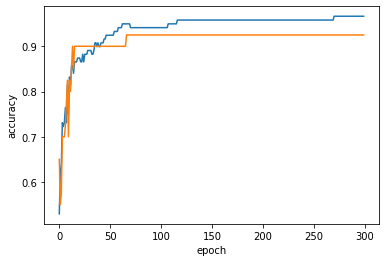

In [ ]:
#그래프로 그려보자
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

백 번째 에포크 정도가 적절한 것 같다

반복 횟수를 100으로 다시 맞추자

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
